# Reference
* [`Full Algorithmic Trading Course`](https://www.youtube.com/watch?v=qkyvj5LIg0M&list=PLtqRgJ_TIq8Y6YG8G-ETIFW_36mvxMLad&index=5)
* [`Algorithmic Trading Using Python - Full Course`](https://www.youtube.com/watch?v=xfzGZB4HhEE)
* [`Algorithmic Trading Python 2023 - FULL TUTORIAL Beginner`](https://www.youtube.com/watch?v=GDMkkmkJigw&t=9s)

#  Notes
* workflow:
    1. Idea Generation
    2. Code Implementation
    3. Testing & Optimizing
    4. Live Deployment

* To-Do
    1. Refactor this notebook
    2. Watch Stan Weinstein Strategy and backtest it

In [1]:
# !pip install autopep8
# !conda info
import platform
platform.python_version()

'3.10.8'

In [2]:
import os
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# plt.style.use('seaborn')

# Load Data & Plot

In [3]:
AAPL = yf.download(
    "AAPL",
    start='2010-01-01',
    end='2023-03-26',
)

[*********************100%***********************]  1 of 1 completed


In [4]:
AAPL.tail(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-22,159.300003,162.139999,157.809998,157.830002,157.830002,75701800
2023-03-23,158.830002,161.550003,157.679993,158.929993,158.929993,67622100
2023-03-24,158.860001,160.339996,157.850006,160.250000,160.250000,59196500


In [5]:
tickers = ['SPY', 'AAPL', 'KO']
start_date = '2010-01-01'
end_date = '2023-03-26'

stocks = yf.download(
    tickers,
    start=start_date,
    end=end_date
)

[*********************100%***********************]  3 of 3 completed


In [6]:
stocks.head(3)

Adj Close                           Close                         \
                AAPL         KO        SPY      AAPL         KO         SPY   
Date                                                                          
2010-01-04  6.505280  18.936367  88.117889  7.643214  28.520000  113.330002   
2010-01-05  6.516528  18.707296  88.351158  7.656429  28.174999  113.629997   
2010-01-06  6.412873  18.700651  88.413353  7.534643  28.165001  113.709999   

                High                              Low                         \
                AAPL         KO         SPY      AAPL         KO         SPY   
Date                                                                           
2010-01-04  7.660714  28.610001  113.389999  7.585000  28.450001  111.510002   
2010-01-05  7.699643  28.495001  113.680000  7.616071  28.070000  112.849998   
2010-01-06  7.686786  28.219999  113.989998  7.526786  27.990000  113.430000   

                Open                            Volume                       
                AAPL         KO         SPY       AAPL        KO        SPY  
Date                                                                         
2010-01-04  7.622500  28.580000  112.370003  493729600  13870400  118944600  
2010-01-05  7.664286  28.424999  113.260002  601904800  23172400  111579900  
2010-01-06  7.656429  28.174999  113.519997  552160000  19264600  116074400

In [7]:
stocks_fp = os.path.join('data', 'stocksYT.csv')
# stocks.to_csv(stocks_fp)

In [8]:
stocks = pd.read_csv(
    stocks_fp,
    header=[0,1],
    index_col=[0],
    parse_dates=[0]
)

stocks.head()

Adj Close                           Close                         \
                AAPL         KO        SPY      AAPL         KO         SPY   
Date                                                                          
2010-01-04  6.505280  18.936369  88.117882  7.643214  28.520000  113.330002   
2010-01-05  6.516528  18.707302  88.351143  7.656429  28.174999  113.629997   
2010-01-06  6.412873  18.700657  88.413368  7.534643  28.165001  113.709999   
2010-01-07  6.401018  18.654179  88.786568  7.520714  28.094999  114.190002   
2010-01-08  6.443574  18.308916  89.082085  7.570714  27.575001  114.570000   

                High                              Low                         \
                AAPL         KO         SPY      AAPL         KO         SPY   
Date                                                                           
2010-01-04  7.660714  28.610001  113.389999  7.585000  28.450001  111.510002   
2010-01-05  7.699643  28.495001  113.680000  7.616071  28.070000  112.849998   
2010-01-06  7.686786  28.219999  113.989998  7.526786  27.990000  113.430000   
2010-01-07  7.571429  28.184999  114.330002  7.466071  27.875000  113.180000   
2010-01-08  7.571429  27.820000  114.620003  7.466429  27.375000  113.660004   

                Open                            Volume                       
                AAPL         KO         SPY       AAPL        KO        SPY  
Date                                                                         
2010-01-04  7.622500  28.580000  112.370003  493729600  13870400  118944600  
2010-01-05  7.664286  28.424999  113.260002  601904800  23172400  111579900  
2010-01-06  7.656429  28.174999  113.519997  552160000  19264600  116074400  
2010-01-07  7.562500  28.165001  113.500000  477131200  13234600  131091100  
2010-01-08  7.510714  27.730000  113.889999  447610800  28712400  126402800

In [9]:
stocks.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close',   'KO'),
            ('Adj Close',  'SPY'),
            (    'Close', 'AAPL'),
            (    'Close',   'KO'),
            (    'Close',  'SPY'),
            (     'High', 'AAPL'),
            (     'High',   'KO'),
            (     'High',  'SPY'),
            (      'Low', 'AAPL'),
            (      'Low',   'KO'),
            (      'Low',  'SPY'),
            (     'Open', 'AAPL'),
            (     'Open',   'KO'),
            (     'Open',  'SPY'),
            (   'Volume', 'AAPL'),
            (   'Volume',   'KO'),
            (   'Volume',  'SPY')],
           )

In [10]:
# convert multi-index to tuple
stocks.columns = stocks.columns.to_flat_index()
stocks.head(3)

,"(Adj Close, AAPL)","(Adj Close, KO)","(Adj Close, SPY)","(Close, AAPL)","(Close, KO)","(Close, SPY)","(High, AAPL)","(High, KO)","(High, SPY)","(Low, AAPL)","(Low, KO)","(Low, SPY)","(Open, AAPL)","(Open, KO)","(Open, SPY)","(Volume, AAPL)","(Volume, KO)","(Volume, SPY)"
Date,,,,,,,,,,,,,,,,,,
2010-01-04,6.505280,18.936369,88.117882,7.643214,28.520000,113.330002,7.660714,28.610001,113.389999,7.585000,28.450001,111.510002,7.622500,28.580000,112.370003,493729600,13870400,118944600
2010-01-05,6.516528,18.707302,88.351143,7.656429,28.174999,113.629997,7.699643,28.495001,113.680000,7.616071,28.070000,112.849998,7.664286,28.424999,113.260002,601904800,23172400,111579900
2010-01-06,6.412873,18.700657,88.413368,7.534643,28.165001,113.709999,7.686786,28.219999,113.989998,7.526786,27.990000,113.430000,7.656429,28.174999,113.519997,552160000,19264600,116074400


In [11]:
# convert back to multi-index
stocks.columns = pd.MultiIndex.from_tuples(stocks.columns)
stocks.head(3)

Adj Close                           Close                         \
                AAPL         KO        SPY      AAPL         KO         SPY   
Date                                                                          
2010-01-04  6.505280  18.936369  88.117882  7.643214  28.520000  113.330002   
2010-01-05  6.516528  18.707302  88.351143  7.656429  28.174999  113.629997   
2010-01-06  6.412873  18.700657  88.413368  7.534643  28.165001  113.709999   

                High                              Low                         \
                AAPL         KO         SPY      AAPL         KO         SPY   
Date                                                                           
2010-01-04  7.660714  28.610001  113.389999  7.585000  28.450001  111.510002   
2010-01-05  7.699643  28.495001  113.680000  7.616071  28.070000  112.849998   
2010-01-06  7.686786  28.219999  113.989998  7.526786  27.990000  113.430000   

                Open                            Volume                       
                AAPL         KO         SPY       AAPL        KO        SPY  
Date                                                                         
2010-01-04  7.622500  28.580000  112.370003  493729600  13870400  118944600  
2010-01-05  7.664286  28.424999  113.260002  601904800  23172400  111579900  
2010-01-06  7.656429  28.174999  113.519997  552160000  19264600  116074400

In [12]:
close = stocks.loc[:, 'Close'].copy()
close.tail(3)

,AAPL,KO,SPY
Date,,,
2023-03-22,157.830002,60.049999,392.109985
2023-03-23,158.929993,59.919998,393.170013
2023-03-24,160.250000,60.900002,395.750000


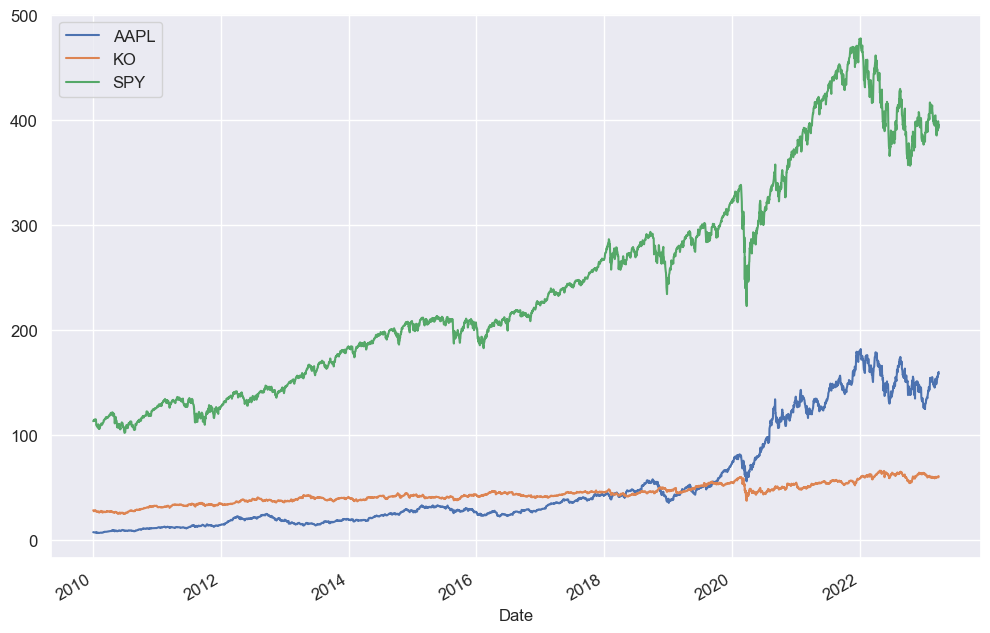

In [13]:
close.plot(
    figsize = (12, 8),
    fontsize = 12
)
plt.legend(fontsize=12)
plt.show()

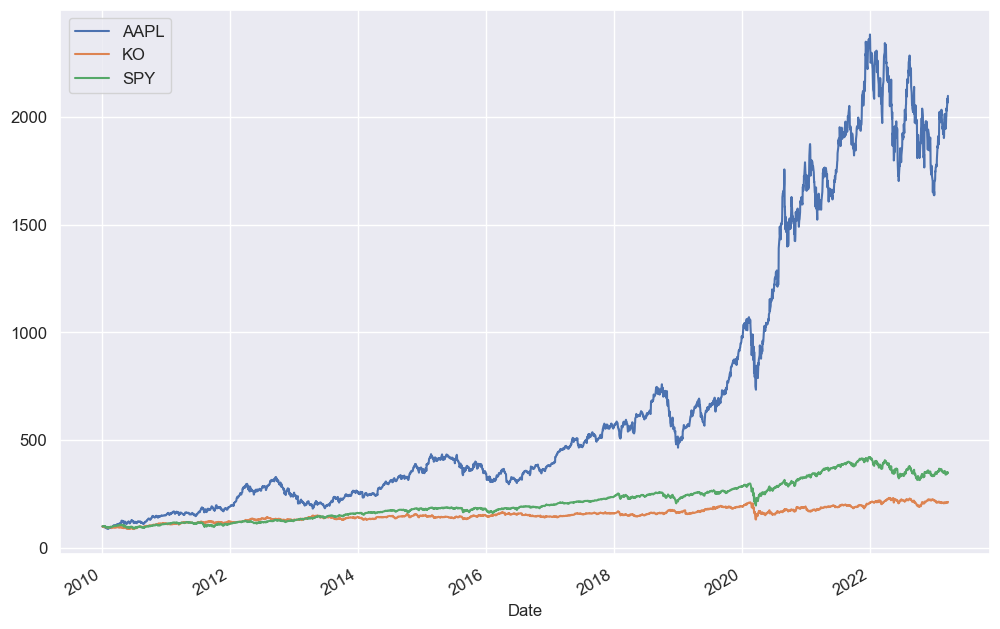

In [14]:
# normalize
normclose = close.div(close.iloc[0]).mul(100)

normclose.plot(
    figsize = (12, 8),
    fontsize = 12
)
plt.legend(fontsize=12)
plt.show()

# Lag, Diff, Percentage Change (Simple Return)

In [15]:
aapl = close.AAPL.copy().to_frame()

aapl['Lag1'] = aapl.shift(periods=1).values

aapl['Diff'] = aapl.AAPL.sub(aapl.Lag1)
aapl['Diff2'] = aapl.AAPL.diff(periods=1)

aapl['% Change'] = aapl.AAPL.div(aapl.Lag1).sub(1).mul(100)
aapl['% Change2'] = aapl.AAPL.pct_change(periods=1).mul(100)

# del aapl['% Change2']

aapl.rename(columns={'% Change2': 'Return'}, inplace=True)

In [16]:
aapl.head(3)

,AAPL,Lag1,Diff,Diff2,% Change,Return
Date,,,,,,
2010-01-04,7.643214,NaN,NaN,NaN,NaN,NaN
2010-01-05,7.656429,7.643214,0.013215,0.013215,0.172893,0.172893
2010-01-06,7.534643,7.656429,-0.121786,-0.121786,-1.590632,-1.590632


In [17]:
# aapl.AAPL.resample('M').last().to_frame()

# last business day
aapl.AAPL.resample('BM').last().pct_change(periods=1).mul(100).to_frame()

,AAPL
Date,
2010-01-29,NaN
2010-02-26,6.539620
2010-03-31,14.847028
2010-04-30,11.102138
2010-05-31,-1.612472
...,...
2022-11-30,-3.462891
2022-12-30,-12.227255
2023-01-31,11.052106


# Simple Return, Annualized mean, var, std

In [18]:
ret = aapl.AAPL.pct_change().dropna()
ret.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 3328 entries, 2010-01-05 to 2023-03-24
Series name: AAPL
Non-Null Count  Dtype  
--------------  -----  
3328 non-null   float64
dtypes: float64(1)
memory usage: 52.0 KB


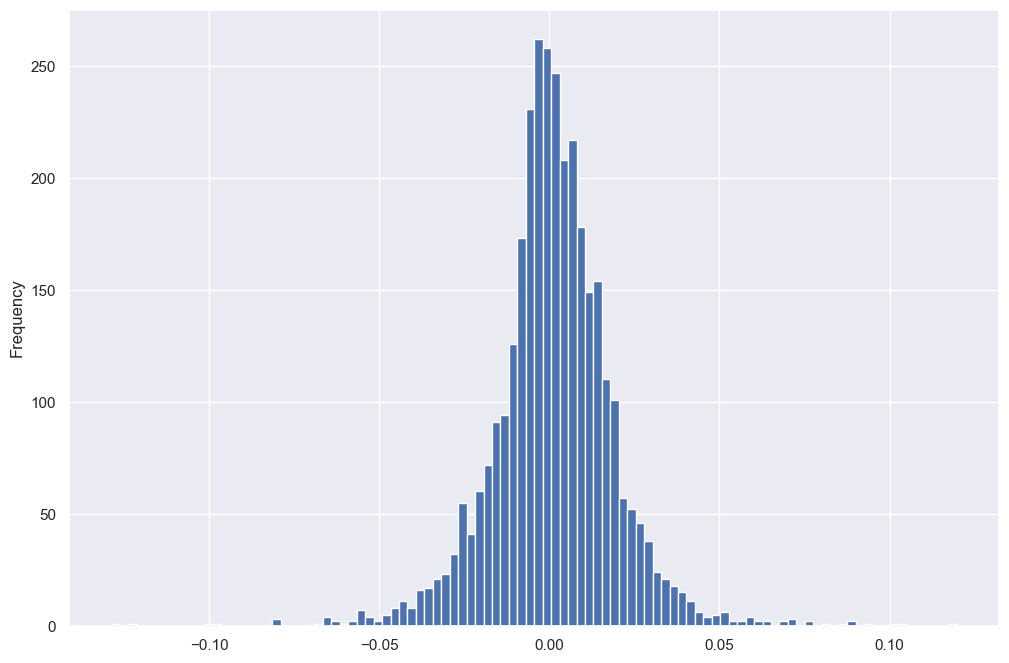

In [19]:
ret.plot(
    kind = 'hist',
    figsize = (12, 8),
    bins = 100
)
plt.show()

In [20]:
daily_mean_ret = ret.mean()
daily_var_ret = ret.var()
# daily_std_ret = np.sqrt(daily_var_ret)
daily_std_ret = ret.std()

In [21]:
annual_mean_ret = daily_mean_ret*252
annual_var_ret = daily_var_ret*252
annual_std_ret = daily_std_ret*np.sqrt(252)

annual_mean_ret, annual_std_ret

(0.27163846235001504, 0.28669915968338744)

# Compare Stocks Risk & Return

In [22]:
tickers = ['SPY', 'AAPL', 'KO', 'IBM', 'DIS', 'MSFT']
start_date = '2010-01-01'
end_date = '2023-03-26'

In [23]:
stocks = yf.download(tickers, start=start_date, end=end_date)

[*********************100%***********************]  6 of 6 completed


In [24]:
close = stocks.loc[:, 'Close'].copy()
normclose = close.div(close.iloc[0]).mul(100)

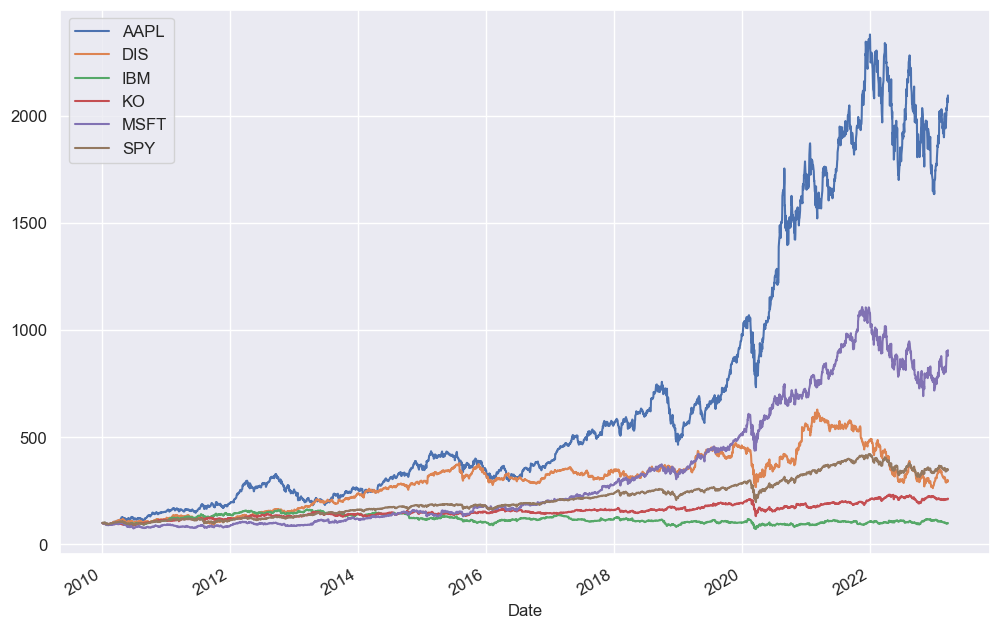

In [25]:
# normalize
normclose.plot(
    figsize = (12, 8),
    fontsize = 12
)
plt.legend(fontsize=12)
plt.show()

In [26]:
ret = close.pct_change().dropna()
ret.head()

,AAPL,DIS,IBM,KO,MSFT,SPY
Date,,,,,,
2010-01-05,0.001729,-0.002495,-0.012080,-0.012097,0.000323,0.002647
2010-01-06,-0.015906,-0.005314,-0.006496,-0.000355,-0.006137,0.000704
2010-01-07,-0.001849,0.000314,-0.003462,-0.002485,-0.010400,0.004221
2010-01-08,0.006648,0.001571,0.010035,-0.018509,0.006897,0.003328
2010-01-11,-0.008821,-0.016311,-0.010470,0.020308,-0.012720,0.001397


In [27]:
# annual summary
summary = ret.describe().T.loc[:, ['mean', 'std']]
summary['mean'] = summary['mean']*252
summary['std'] = summary['std']*np.sqrt(252)
summary

,mean,std
AAPL,0.271638,0.286699
DIS,0.115554,0.261116
IBM,0.024793,0.225634
KO,0.072957,0.175697
MSFT,0.201077,0.261165
SPY,0.110362,0.176619


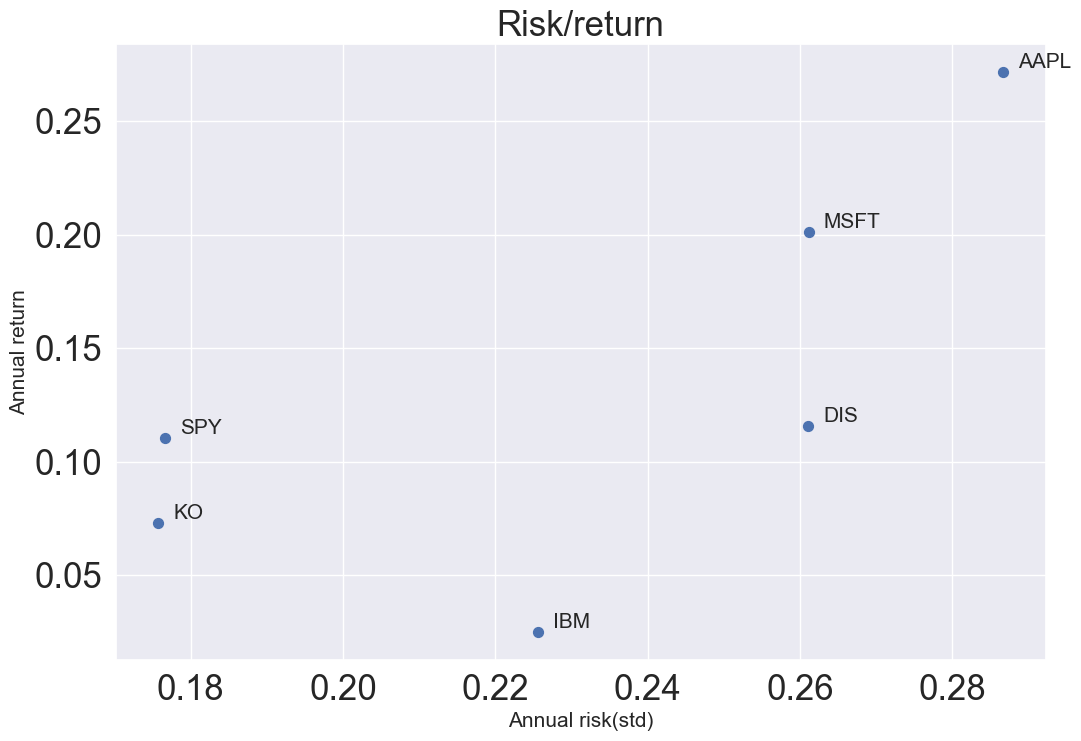

In [28]:
summary.plot.scatter(
    x='std',
    y='mean',
    figsize=(12, 8),
    s=50,
    fontsize=25
)
for i in summary.index:
    plt.annotate(
        i, 
        xy = (
            summary.loc[i, 'std']+0.002, 
            summary.loc[i, 'mean']+0.002
        ),
        size = 15
    )
# plt.legend()
plt.xlabel('Annual risk(std)', fontsize=15)
plt.ylabel('Annual return', fontsize=15)
plt.title('Risk/return', fontsize=25)
plt.show()

# Covariance & Correlation

In [29]:
import seaborn as sns

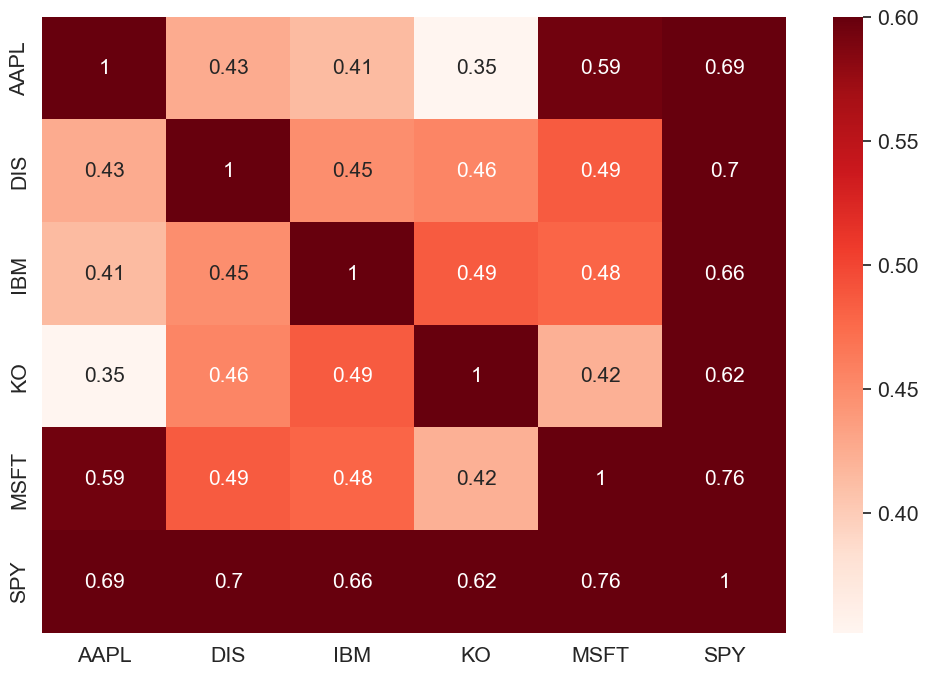

In [30]:
plt.figure(figsize=(12, 8))
sns.set(font_scale = 1.4)
sns.heatmap(
    ret.corr(), 
    cmap = 'Reds', 
    annot=True, 
    annot_kws = {'size':15},
    vmax = 0.6
)
plt.show()

# Simple returns and log returns
* Log returns have several advantages over simple returns. **One of the main advantages is that they are additive**. If you add the log returns of two different time periods, you get the total log return for the combined time period. In contrast, simple returns are not additive. If you add the simple returns of two different time periods, you get the total return for the combined time period, but it is not equivalent to the sum of the individual returns.

* **Log returns also have a better statistical distribution than simple returns. They are approximately normally distributed, which makes them more suitable for statistical analysis**. Simple returns, on the other hand, have a skewed distribution that makes statistical analysis more difficult.

* **In general, log returns are preferred over simple returns in financial analysis and modeling**. This is because log returns have better statistical properties and are more additive than simple returns. However, there may be situations where simple returns are more appropriate, such as when you are calculating returns for very short time periods (e.g. intraday trading) or when you need to present returns to a non-technical audience.

# SMA vs EMA
* SMA (Simple Moving Average) and EMA (Exponential Moving Average) are two popular methods for calculating moving averages of financial data.

* SMA is calculated by taking the arithmetic mean of a set of prices over a given time period. For example, the 10-day SMA is calculated by summing the closing prices of the last 10 days and dividing by 10. Each day, the oldest price in the set is dropped and the newest price is added. The resulting SMA line is a smoother representation of the price trend over the specified time period.

* EMA, on the other hand, places more weight on recent prices and less weight on older prices. The formula for calculating the EMA is more complex than the SMA formula and involves using a smoothing factor that gives more weight to recent data. The smoothing factor is typically expressed as a percentage, with commonly used values ranging from 2% to 30%.

* **Because EMAs give more weight to recent prices, they are more responsive to short-term price movements than SMAs. This can make them more useful for short-term trading strategies.** However, the downside of using EMAs is that they can be more volatile and may produce more false signals in choppy markets.

* In summary, SMAs are simpler to calculate and can provide a smoother representation of long-term price trends, while EMAs give more weight to recent prices and can be more useful for short-term trading strategies. The choice of which to use depends on the specific needs and goals of the investor or trader.

In [31]:
SPY = yf.download('SPY', start='2022-01-01')

[*********************100%***********************]  1 of 1 completed


In [32]:
spy = SPY.Close.to_frame()

spy['SMA10'] = spy.Close.rolling(window=10, min_periods=10).mean()
spy['SMA60'] = spy.Close.rolling(window=60, min_periods=60).mean()
# spy.rolling(window=10).max()
# spy.rolling(window=10).min()
# spy.rolling(window=10).median()

spy['EWMA60'] = spy.Close.ewm(span=60, min_periods=60).mean()

spy.head(5)

,Close,SMA10,SMA60,EWMA60
Date,,,,
2022-01-03,477.709991,NaN,NaN,NaN
2022-01-04,477.549988,NaN,NaN,NaN
2022-01-05,468.380005,NaN,NaN,NaN
2022-01-06,467.940002,NaN,NaN,NaN
2022-01-07,466.089996,NaN,NaN,NaN


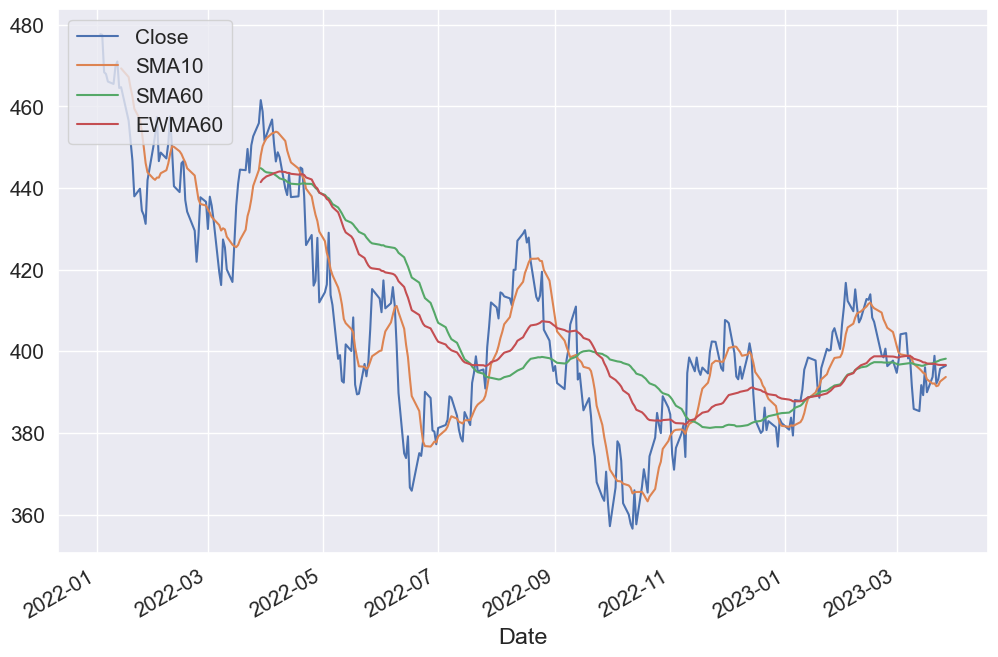

In [33]:
spy.plot(figsize=(12, 8), fontsize=15)
plt.legend(loc = 'upper left', fontsize=15)
plt.show()

 # Back Fill & Forward Fill

In [34]:
all_days = pd.date_range(
    start='2010-12-31',
    end= '2020-01-01',
    freq='D'
)
all_days

DatetimeIndex(['2010-12-31', '2011-01-01', '2011-01-02', '2011-01-03',
               '2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-08', '2011-01-09',
               ...
               '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
               '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30',
               '2019-12-31', '2020-01-01'],
              dtype='datetime64[ns]', length=3289, freq='D')

In [35]:
spy = yf.download('SPY')

[*********************100%***********************]  1 of 1 completed


In [36]:
spy.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.96875,43.96875,43.75000,43.93750,25.122343,1003200
1993-02-01,43.96875,44.25000,43.96875,44.25000,25.301023,480500
1993-02-02,44.21875,44.37500,44.12500,44.34375,25.354630,201300
1993-02-03,44.40625,44.84375,44.37500,44.81250,25.622646,529400
1993-02-04,44.96875,45.09375,44.46875,45.00000,25.729856,531500


In [37]:
spy.index.min(), spy.index.max()

(Timestamp('1993-01-29 00:00:00'), Timestamp('2023-03-27 00:00:00'))

In [38]:
close = spy.Close.to_frame()

In [39]:
close = close.reindex(all_days)

In [40]:
close

,Close
2010-12-31,125.750000
2011-01-01,NaN
2011-01-02,NaN
2011-01-03,127.050003
2011-01-04,126.980003
...,...
2019-12-28,NaN
2019-12-29,NaN
2019-12-30,321.079987
2019-12-31,321.859985


In [41]:
close.fillna(method='ffill')
# close.fillna(method='bfill')

,Close
2010-12-31,125.750000
2011-01-01,125.750000
2011-01-02,125.750000
2011-01-03,127.050003
2011-01-04,126.980003
...,...
2019-12-28,322.859985
2019-12-29,322.859985
2019-12-30,321.079987
2019-12-31,321.859985


# Cumulative Returns, Drawdowns etc

In [42]:
AAPL = yf.download('AAPL')

[*********************100%***********************]  1 of 1 completed


In [43]:
apple = AAPL.Close.to_frame()

apple['daily_returns'] = np.log(apple.Close.div(apple.Close.shift(1)))
apple['cum_returns'] = apple.daily_returns.cumsum().apply(np.exp)
apple.dropna(inplace=True)

In [44]:
apple

,Close,daily_returns,cum_returns
Date,,,
1980-12-15,0.121652,-0.053581,0.947829
1980-12-16,0.112723,-0.076231,0.878261
1980-12-17,0.115513,0.024450,0.899998
1980-12-18,0.118862,0.028580,0.926092
1980-12-19,0.126116,0.059239,0.982610
...,...,...,...
2023-03-21,159.279999,0.011873,1241.001088
2023-03-22,157.830002,-0.009145,1229.703701
2023-03-23,158.929993,0.006945,1238.274079


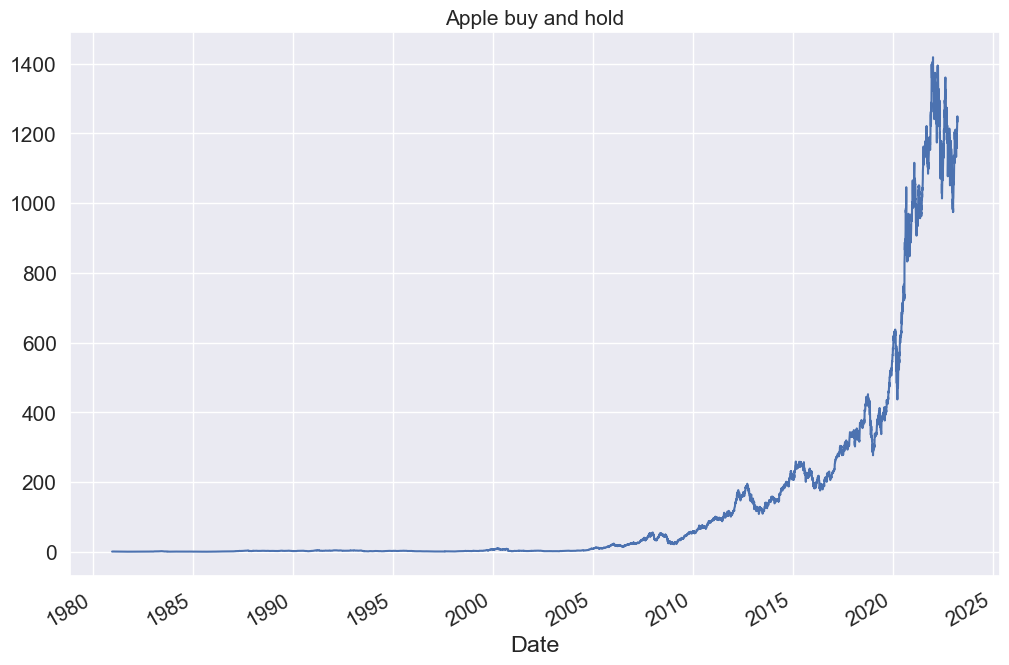

In [45]:
apple.cum_returns.plot(
    figsize=(12, 8), 
    fontsize=15
)
plt.title('Apple buy and hold', fontsize=15)
plt.show()

## How to calculate drawdown

In [46]:
apple['cum_max'] = apple.cum_returns.cummax()
apple['drawdown'] = apple['cum_max'] - apple['cum_returns']
apple['drawdown %'] = (
    apple['cum_max'] - apple['cum_returns']).div(apple['cum_max'])

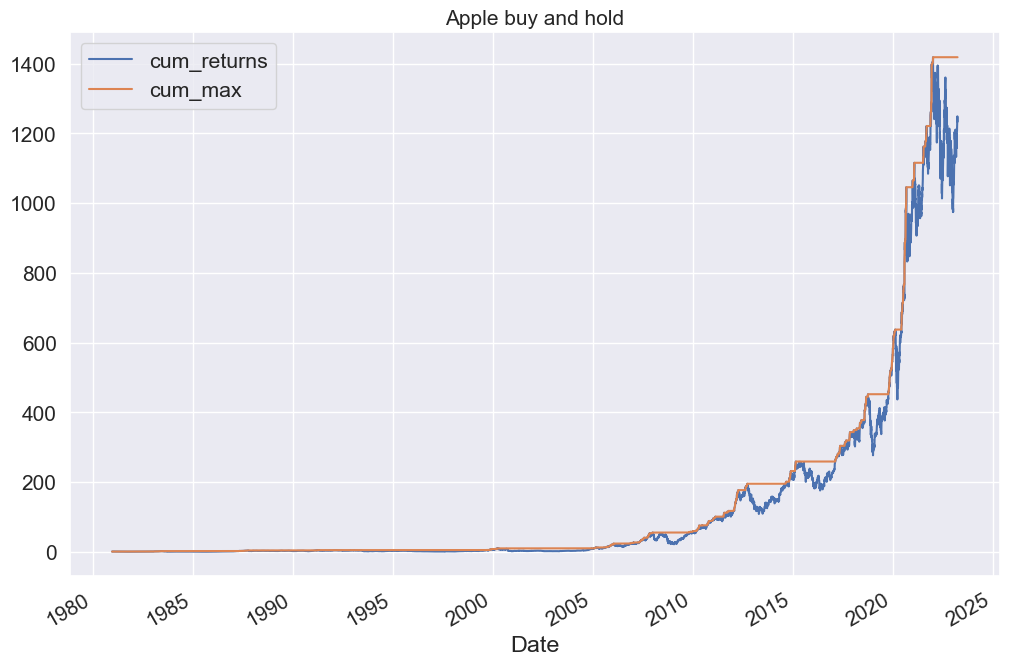

In [47]:
apple[['cum_returns', 'cum_max']].plot(
    figsize=(12, 8), 
    fontsize=15
)
plt.title('Apple buy and hold', fontsize=15)
plt.show()

In [48]:
apple['drawdown %'].max()

0.82216567924191

In [49]:
apple['drawdown %'].idxmax()

Timestamp('1997-12-23 00:00:00')

In [50]:
apple.loc[(apple.index <= '1997-12-23')].tail(10)

,Close,daily_returns,cum_returns,cum_max,drawdown,drawdown %
Date,,,,,,
1997-12-10,0.131696,-0.033342,1.026085,5.060882,4.034796,0.797252
1997-12-11,0.130022,-0.012793,1.013043,5.060882,4.047839,0.799829
1997-12-12,0.126116,-0.030502,0.982610,5.060882,4.078272,0.805842
1997-12-15,0.124442,-0.013362,0.969567,5.060882,4.091315,0.808419
1997-12-16,0.127790,0.026549,0.995653,5.060882,4.065229,0.803265
1997-12-17,0.124442,-0.026549,0.969567,5.060882,4.091315,0.808419
1997-12-18,0.123326,-0.009008,0.960872,5.060882,4.100010,0.810137
1997-12-19,0.122210,-0.009090,0.952177,5.060882,4.108705,0.811856
1997-12-22,0.118862,-0.027778,0.926092,5.060882,4.134790,0.817010


# SMA Strategy & Backtest

In [51]:
AAPL = yf.download('AAPL', start='2022-01-01')

[*********************100%***********************]  1 of 1 completed


## Strategy 1 : Strategy with short position

In [52]:
def get_max_drawdown(ts):
    cum_return = ts.cumsum().apply(np.exp)
    cum_max = cum_return.cummax()
    drawdown = cum_max - cum_return
    drawdown_pct = (cum_max - cum_return).div(cum_max)
    return drawdown_pct.max(), drawdown_pct.idxmax()

In [53]:
data = AAPL.Close.to_frame()

sma_s = 5
sma_l = 15

data['sma_s'] = data.Close.rolling(window=sma_s).mean()
data['sma_l'] = data.Close.rolling(window=sma_l).mean()
data['signal'] = np.where(data.sma_s>data.sma_l, 1, -1)
data['position'] = data['signal'].shift(1)

data['return_b&h'] = np.log(data.Close.div(data.Close.shift(1)))
data['return_alpha'] = data['return_b&h']*data['position']

data.dropna(inplace=True)

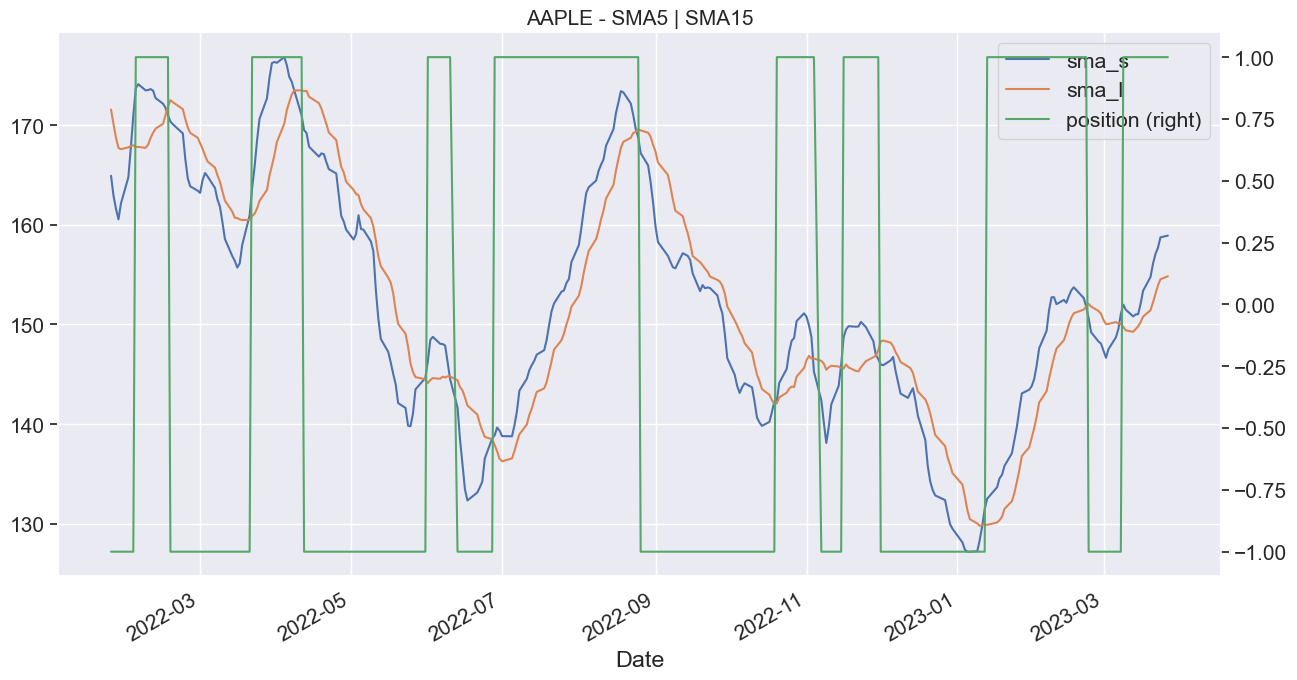

In [54]:
data.loc[:, ['sma_s', 'sma_l', 'position']].plot(
    figsize=(15, 8), 
    fontsize=15,
    secondary_y = 'position'
)
plt.title(f'AAPLE - SMA{sma_s} | SMA{sma_l}', fontsize=15)
plt.show()

In [55]:
data[['return_b&h', 'return_alpha']].sum()

return_b&h     -0.025758
return_alpha    0.378396
dtype: float64

The SMA strategy has a much higher cumulative return, which is very good

In [56]:
# return : the absolute value of $1 investment
data[['return_b&h', 'return_alpha']].sum().apply(np.exp)

return_b&h      0.974571
return_alpha    1.459941
dtype: float64

In [57]:
# risk
data[['return_b&h', 'return_alpha']].std()*np.sqrt(252)

return_b&h      0.342955
return_alpha    0.342350
dtype: float64

In [58]:
# max drawdown
get_max_drawdown(data[['return_b&h', 'return_alpha']])

(return_b&h      0.301408
 return_alpha    0.228964
 dtype: float64,
 return_b&h     2023-01-05
 return_alpha   2022-11-29
 dtype: datetime64[ns])

In [59]:
# data.loc[(data.index<="2023-01-05"), :].tail(10)

## Strategy 2 : Strategy adjusted with long bias (without short position)

In [60]:
data = AAPL.Close.to_frame()

sma_s = 5
sma_l = 15

data['sma_s'] = data.Close.rolling(window=sma_s).mean()
data['sma_l'] = data.Close.rolling(window=sma_l).mean()
data['signal'] = np.where(data.sma_s>data.sma_l, 1, 0)
data['position'] = data['signal'].shift(1)

data['return_b&h'] = np.log(data.Close.div(data.Close.shift(1)))
data['return_alpha'] = data['return_b&h']*data['position']

data.dropna(inplace=True)

In [61]:
data[['return_b&h', 'return_alpha']].sum()

return_b&h     -0.025758
return_alpha    0.176319
dtype: float64

In [62]:
# return : the absolute value of $1 investment
data[['return_b&h', 'return_alpha']].sum().apply(np.exp)

return_b&h      0.974571
return_alpha    1.192818
dtype: float64

In [63]:
# risk
data[['return_b&h', 'return_alpha']].std()*np.sqrt(252)

return_b&h      0.342955
return_alpha    0.201638
dtype: float64

In [64]:
# max drawdown
get_max_drawdown(data[['return_b&h', 'return_alpha']])

(return_b&h      0.301408
 return_alpha    0.176440
 dtype: float64,
 return_b&h     2023-01-05
 return_alpha   2022-06-30
 dtype: datetime64[ns])

## Strategy written in `Class`

In [65]:
import os
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [66]:
class SMABacktester():
    def __init__(
        self,
        symbol=None,
        SMA_S=None,
        SMA_L=None,
        start_date=None,
        end_date=None,
        long_bias=False
    ):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start_date = start_date
        self.end_date = end_date
        self.long_bias = long_bias
        self.data = self.get_data()

    def get_data(self):
        df = yf.download(
            self.symbol,
            start=self.start_date,
            end=self.end_date
        )

        data = df.Close.to_frame()
        return data

    def create_alpha(self, data):
        # signal
        data['SMA_S'] = data.Close.rolling(window=self.SMA_S).mean()
        data['SMA_L'] = data.Close.rolling(window=self.SMA_L).mean()
        if self.long_bias:
            data['Signal'] = np.where(data.SMA_S > data.SMA_L, 1, 0)
        else:
            data['Signal'] = np.where(data.SMA_S > data.SMA_L, 1, -1)
        data['Position'] = data['Signal'].shift(1)
        data['ret_bh'] = np.log(data.Close.div(data.Close.shift(1)))
        data['ret_alpha'] = data['ret_bh']*data['Position']
        data.dropna(inplace=True)
        return data

    def get_max_drawdown(self, ts):
        cum_return = ts.cumsum().apply(np.exp)
        cum_max = cum_return.cummax()
        drawdown = cum_max - cum_return
        drawdown_pct = (cum_max - cum_return).div(cum_max)
        return drawdown_pct.max(), drawdown_pct.idxmax()

    def backtest(self, data):
        # cumulative return
        data['cum_ret_bh'] = data['ret_bh'].cumsum().apply(np.exp)
        data['cum_ret_alpha'] = data['ret_alpha'].cumsum().apply(np.exp)

        # return
        annuallized_ret_bh = data['cum_ret_bh'].iloc[-1]-1
        annuallized_ret_alpha = data['cum_ret_alpha'].iloc[-1]-1

        # risk
        std_bh = data['ret_bh'].std()
        std_alpha = data['ret_alpha'].std()
        annuallized_risk_bh = std_bh*np.sqrt(252)
        annuallized_risk_alpha = std_alpha*np.sqrt(252)

        # max drawdown
        max_drawdown_bh = self.get_max_drawdown(data['ret_bh'])
        max_drawdown_alpha = self.get_max_drawdown(data['ret_alpha'])

        return pd.DataFrame(
            data={
                '1$ Investment': {
                    "Buy Hold": data['cum_ret_bh'].iloc[-1],
                    "SMA": data['cum_ret_alpha'].iloc[-1]
                },
                'Annualized Return': {
                    "Buy Hold": annuallized_ret_bh,
                    "SMA": annuallized_ret_alpha
                },
                'Annualized Risk': {
                    "Buy Hold": annuallized_risk_bh,
                    "SMA": annuallized_risk_alpha
                },
                'Max Drawdown': {
                    "Buy Hold": max_drawdown_bh,
                    "SMA": max_drawdown_alpha
                },
            }
        )

    def __call__(self):
        self.data = self.create_alpha(self.data)
        self.results = self.backtest(self.data)
        return self.results

    def plot_trade_entry(self):
        self.data.loc[:, ['Close', 'SMA_S', 'SMA_L', 'Position']].plot(
            figsize=(15, 8),
            fontsize=15,
            secondary_y='Position'
        )
        plt.title(
            f'{self.symbol} - SMA{self.SMA_S} | SMA{self.SMA_L}', fontsize=15)
        plt.show()

    def plot_results(self):
        title = f'{self.symbol} - SMA{self.SMA_S} | SMA{self.SMA_L}'
        self.data[['cum_ret_bh', 'cum_ret_alpha']].plot(
            title=title,
            figsize=(12, 8)
        )
        plt.show()

In [67]:
sma_strategy = SMABacktester(
    symbol='ARKK', SMA_S=5, SMA_L=15, 
    start_date='2022-11-01', 
#     end_date='2022-12-31',
    long_bias=True
)
sma_strategy()

[*********************100%***********************]  1 of 1 completed


,1$ Investment,Annualized Return,Annualized Risk,Max Drawdown
Buy Hold,1.032823,0.032823,0.491057,"(0.2232704531402526, 2022-12-28 00:00:00)"
SMA,1.069361,0.069361,0.329978,"(0.19267768194465978, 2023-03-24 00:00:00)"


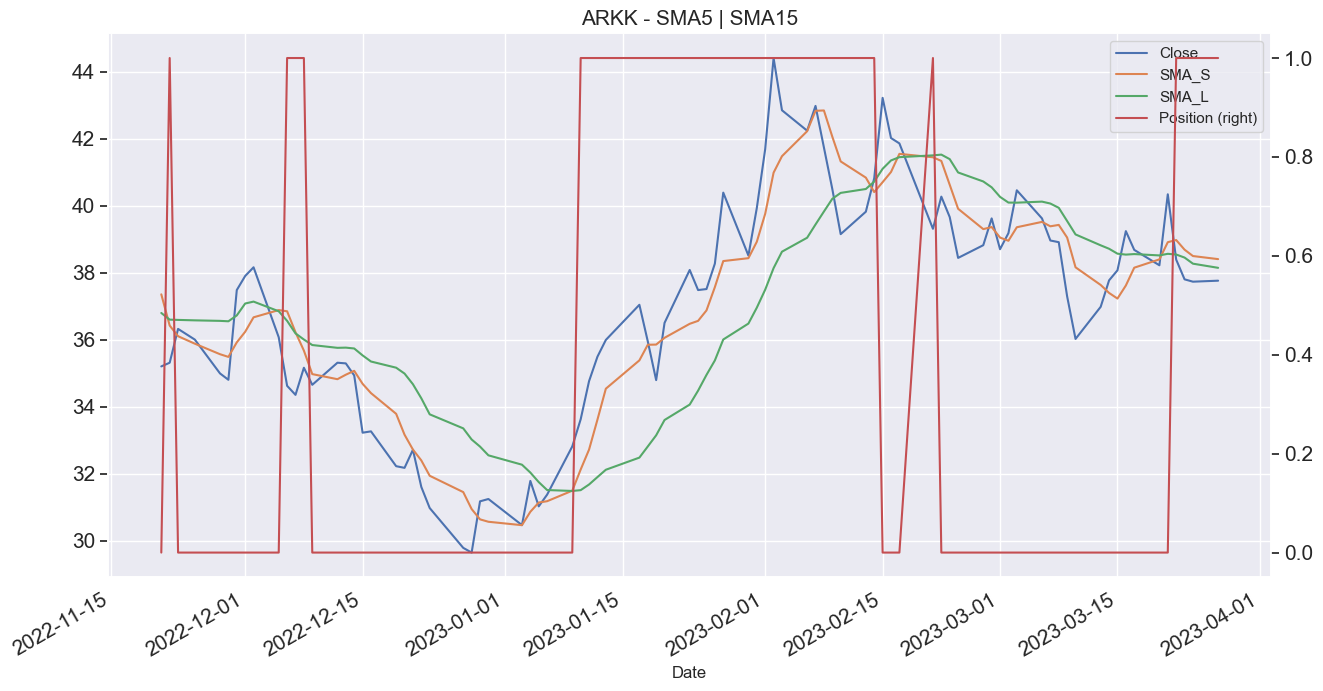

In [68]:
sma_strategy.plot_trade_entry()

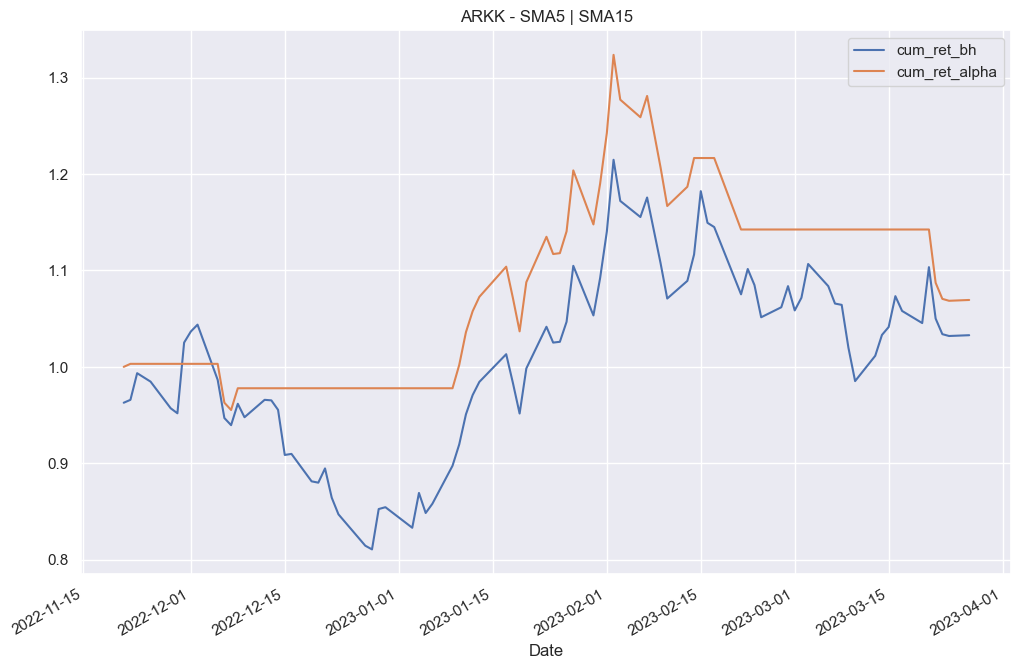

In [69]:
sma_strategy.plot_results()